In [5]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mysql-connector-python


In [14]:
#Connecting SQL

import mysql.connector
con = mysql.connector.connect(user = 'hbs-student', password = 'super-secure-password?', host = 'hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com', database = 'movies')
cur = con.cursor()

In [3]:
#Importing SQL data (IMDB Ratings)

cur.execute("""SELECT *
                FROM movies.imdb_title_ratings
                JOIN movies.imdb_title_basics USING (tconst)
                JOIN movies.imdb_title_crew USING (tconst)
                LEFT JOIN movies.imdb_name_basics ON movies.imdb_name_basics.nconst = movies.imdb_title_crew.directors
                WHERE imdb_title_basics.start_year >= 2010
                AND imdb_title_ratings.averagerating >6.5
                AND imdb_title_ratings.numvotes > 50;""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df




,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824"
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487"
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13516,tt9904844,8.70,218,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,nm4942142,None,nm4942142,Tarvo Mölder,NaN,NaN,"director,actor","tt7716654,tt1678635,tt3686032"
13517,tt9905412,8.10,505,Ottam,Ottam,2019,120.0,Drama,nm10533890,nm10533895,nm10533890,Zam,NaN,NaN,director,
13518,tt9905462,8.40,600,Pengalila,Pengalila,2019,111.0,Drama,nm0151535,nm0151535,nm0151535,T.V. Chandran,1950.0,NaN,"director,writer,actor","tt0207956,tt0356505,tt0248317,tt0390526"
13519,tt9911774,8.40,365,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,nm10536451,"nm10536451,nm10536453,nm10536454",nm10536451,Vineesh Aaradya,NaN,NaN,"writer,director",


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521 entries, 0 to 13520
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              13521 non-null  object 
 1   averagerating       13521 non-null  object 
 2   numvotes            13521 non-null  int64  
 3   primary_title       13521 non-null  object 
 4   original_title      13521 non-null  object 
 5   start_year          13521 non-null  int64  
 6   runtime_minutes     13039 non-null  float64
 7   genres              13521 non-null  object 
 8   directors           13521 non-null  object 
 9   writers             11570 non-null  object 
 10  nconst              11832 non-null  object 
 11  primary_name        11832 non-null  object 
 12  birth_year          4679 non-null   float64
 13  death_year          112 non-null    float64
 14  primary_profession  11832 non-null  object 
 15  known_for_titles    11832 non-null  object 
dtypes: f

In [5]:
#Spliting genres into columns

df[['Genres_1', 'Genres_2', 'Genres_3']] = df.genres.str.split(",", expand=True)
df.head(5)



,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765",Action,Crime,Drama
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467",Drama,None,None
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824",Adventure,Animation,Comedy
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487",Drama,None,None
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600",Documentary,None,None


In [6]:
arr_genres = df.Genres_1.unique()
arr_genres

array(['Action', 'Drama', 'Adventure', 'Documentary', 'Animation',
       'Crime', 'Thriller', 'Comedy', 'Biography', 'Horror', 'Fantasy',
       'Mystery', 'Romance', 'History', 'Sport', '', 'Music', 'Family',
       'Musical', 'Sci-Fi', 'War'], dtype=object)

In [7]:
list_genres = arr_genres.tolist()
list_genres.remove('')


In [8]:
genres_count = []
for genre in list_genres:
    genres_count.append(df['genres'].apply(lambda x: genre in x).astype(np.uint8).sum())
genres_count 

#df['isAdventure'] = df['genres'].apply(lambda x: 'Adventure' in x).astype(np.uint8)
#total_adventure = df['isAdventure'].sum()
    

[1259,
 6907,
 819,
 4180,
 526,
 981,
 1003,
 2728,
 1271,
 355,
 313,
 452,
 1324,
 788,
 374,
 713,
 615,
 146,
 236,
 249]

In [9]:
#Connecting two lists to dictionary and transforming to DataFrame
#Sorting values by count (sum of all three genre types)

genres_cumulative = {'genres': list_genres, 'genres_count': genres_count}
genres_total = pd.DataFrame.from_dict(genres_cumulative)
genres_total.sort_values(by = 'genres_count', ascending = False)


,genres,genres_count
1,Drama,6907
3,Documentary,4180
7,Comedy,2728
12,Romance,1324
8,Biography,1271
0,Action,1259
6,Thriller,1003
5,Crime,981
2,Adventure,819
13,History,788


In [10]:
#Grouping by Genres1

genres1 = df.groupby('Genres_1').count().sort_values(by = 'tconst', ascending = False)
genres1 = genres1.tconst.reset_index()
genres1 = genres1.rename(columns={"tconst": "genres_count"})
genres1

,Genres_1,genres_count
0,Drama,3847
1,Documentary,3122
2,Comedy,2208
3,Action,1259
4,Biography,1130
5,Adventure,542
6,Crime,514
7,Animation,232
8,Horror,137
9,Thriller,116


In [11]:
#Grouping by Genres2
genres2 = df.groupby('Genres_2').count().sort_values(by = 'tconst', ascending = False)
genres2 = genres2.tconst.reset_index()
genres2 = genres2.rename(columns={"tconst": "genres_count"})
genres2

,Genres_2,genres_count
0,Drama,2422
1,Documentary,904
2,Romance,677
3,History,399
4,Crime,393
5,Comedy,384
6,Thriller,363
7,Music,312
8,Family,307
9,Adventure,277


In [12]:
#Renaming director column
df = df.rename(columns={"primary_name": "director_name"})
df.head(5)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,director_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765",Action,Crime,Drama
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467",Drama,None,None
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824",Adventure,Animation,Comedy
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487",Drama,None,None
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600",Documentary,None,None


In [ ]:
#Grouping top rated movies by directors

top_directors = df.groupby('director_name').count().sort_values(by = 'tconst', ascending = False)
top_directors = top_directors.tconst.reset_index()
top_directors = top_directors.rename(columns={"tconst": "movies_count"})
top_directors = top_directors.loc[top_directors['movies_count'] >= 6]
len(top_directors)

#There are 36 directors who produces 6+ movies with rating 7.0+ over last 10 years

In [1]:
top_directors.head(13)

#Are these directors still alive? Still working?

NameError: name 'top_directors' is not defined

In [2]:
pd_roi = pd.read_sql_query('select * from tn_movie_budgets', con)
pd_roi ["release_date"] = pd.to_datetime(pd_roi ["release_date"]) 
pd_roi.head()

NameError: name 'pd' is not defined

In [3]:
#Cleaning those 3 columns
pd_roi ["production_budget"] = pd_roi ["production_budget"].map(lambda x: x.lstrip('$')).str.replace(',','')
pd_roi ["domestic_gross"] = pd_roi ["domestic_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
pd_roi ["worldwide_gross"] = pd_roi ["worldwide_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
pd_roi = pd_roi.astype({"production_budget":'int64', "domestic_gross":'int64',"worldwide_gross":'int64'}) 

#New column roi metrics that show you 
pd_roi ["roi"] = (pd_roi ["worldwide_gross"])/pd_roi ["production_budget"]
pd_roi = pd_roi.sort_values("roi",ascending = 0)

# Selecting movies after 2000
pd_roi['year'] = pd_roi['release_date'].apply(lambda x: x.year)
pd_roi = pd_roi.loc [pd_roi['year'] > 2010]
pd_roi = pd_roi.loc [pd_roi['roi'] > 5]
pd_roi.head()

NameError: name 'pd_roi' is not defined

In [ ]:
pd_roi = pd_roi.rename(columns={'movie': 'primary_title'})

In [ ]:
# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['primary_title'] = df['primary_title'].str.replace(char, ' ')
    pd_roi['primary_title'] = pd_roi['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df['primary_title'] =  df['primary_title'].map(lambda x: x.lower())
pd_roi['primary_title'] = pd_roi['primary_title'].map(lambda x: x.lower())

pd_roi.head()

In [ ]:
left_join_df_roi = pd_roi.merge(df, on='primary_title', how='left' )

In [ ]:
left_join_df_roi.head()

In [ ]:
df_join = left_join_df_roi.dropna(subset = ["averagerating"])
df_join.head()

In [ ]:
df_join.info

In [ ]:
#Grouping by Genres1

genres1 = df_join.groupby('Genres_1').count().sort_values(by = 'tconst', ascending = False)
genres1 = genres1.tconst.reset_index()
genres1 = genres1.rename(columns={"tconst": "genres_count"})
genres1

In [ ]:
#Grouping by Genres2
genres2 = df_join.groupby('Genres_2').count().sort_values(by = 'tconst', ascending = False)
genres2 = genres2.tconst.reset_index()
genres2 = genres2.rename(columns={"tconst": "genres_count"})
genres2

In [ ]:
#Grouping top rated movies by directors

top_directors = df_join.groupby('director_name').count().sort_values(by = 'tconst', ascending = False)
top_directors = top_directors.tconst.reset_index()
top_directors = top_directors.rename(columns={"tconst": "movies_count"})
top_directors = top_directors.loc[top_directors['movies_count'] >= 2]
top_directors

In [ ]:
#Creating df_act
cur.execute("""SELECT *
                FROM movies.imdb_title_ratings
                JOIN movies.imdb_title_basics USING(tconst)
                JOIN movies.imdb_title_principals USING (tconst)
                JOIN movies.imdb_name_basics USING (nconst)
                WHERE imdb_title_basics.start_year >= 2010
                AND imdb_title_ratings.averagerating >7.0
                AND imdb_title_ratings.numvotes > 50;""")

df_act = pd.DataFrame(cur.fetchall())
df_act.columns = [x[0] for x in cur.description]
df_act

In [ ]:
# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_act['primary_title'] = df_act['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df_act['primary_title'] =  df_act['primary_title'].map(lambda x: x.lower())

df_act.head()

In [ ]:
left_join_df_act = df_join.merge(df_act, on='primary_title', how='left' )
left_join_df_act.info

In [ ]:

df_join_act = left_join_df_act.dropna(subset = ["primary_name"])
df_join_act.head()

In [ ]:
df_act_count = df_join_act.loc[(df_join_act['category'] == 'actor') |(df_join_act['category'] == 'actress')].groupby('primary_name').count().sort_values(by = 'roi', ascending = False) 
df_act_count = df_act_count.tconst_x.reset_index()
df_act_count = df_act_count.rename(columns={"tconst_x": "how_many_movies"})
df_act_count.how_many_movies.value_counts()

In [ ]:
df_act_count.head(20)

In [53]:
#Now let's do some plotting

In [71]:
# What's the best month to release a movie?
pd_roi['month'] = df_join['release_date'].apply(lambda x: x.month)

graph_month = df_join.groupby('month').count().sort_values(by = 'month', ascending = True)
graph_month = graph_month.tconst.reset_index()
graph_month = graph_month.rename(columns={"tconst": "month_count"})
graph_month

,month,month_count
0,1,7
1,2,11
2,3,20
3,4,13
4,5,9
5,6,23
6,7,17
7,8,12
8,9,12
9,10,19


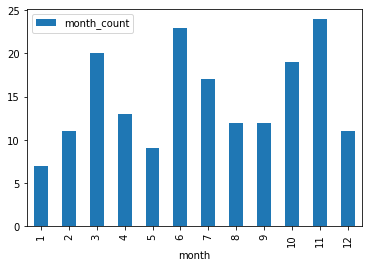

In [73]:
# Plot the bar char for graph_month
ax = graph_month.plot( x='month', y='month_count', kind='bar')

In [1]:
dic_month = {1 : "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7:"Jul", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"}
graph_month.month.map(dic_month)

NameError: name 'graph_month' is not defined

In [ ]:
# 2x2 graph with ROI and ratings


In [10]:
#Creating df_all from IMDB ratings
cur.execute("""SELECT *
                FROM movies.imdb_title_ratings
                JOIN movies.imdb_title_basics USING(tconst)
                WHERE imdb_title_basics.start_year >= 2010
                AND imdb_title_ratings.numvotes > 50;""")



df_all = pd.DataFrame(cur.fetchall())
df_all.columns = [x[0] for x in cur.description]

# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_all['primary_title'] = df_all['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df_all['primary_title'] =  df_all['primary_title'].map(lambda x: x.lower())

df_all.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.00,77,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0069049,6.90,4517,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama
2,tt0100275,6.50,119,the wandering soap opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
3,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
4,tt0146592,6.80,451,pál adrienn,Pál Adrienn,2010,136.0,Drama


In [16]:
#Creating df_roi from tn_movie_budgets
df_roi = pd.read_sql_query('select * from tn_movie_budgets', con)
df_roi ["release_date"] = pd.to_datetime(df_roi ["release_date"]) 
df_roi.head()

#Cleaning those 3 columns
df_roi ["production_budget"] = df_roi ["production_budget"].map(lambda x: x.lstrip('$')).str.replace(',','')
df_roi ["domestic_gross"] = df_roi ["domestic_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
df_roi ["worldwide_gross"] = df_roi ["worldwide_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
df_roi = df_roi.astype({"production_budget":'int64', "domestic_gross":'int64',"worldwide_gross":'int64'}) 

#New column roi metrics that show you 
df_roi ["roi"] = (df_roi ["worldwide_gross"])/df_roi ["production_budget"]
df_roi = df_roi.sort_values("roi",ascending = 0)

# Selecting movies after 2000
df_roi['year'] = df_roi['release_date'].apply(lambda x: x.year)
df_roi = df_roi.loc [df_roi['year'] > 2010]

#Rename column
df_roi = df_roi.rename(columns={'movie': 'primary_title'})

# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_roi['primary_title'] = df_roi['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df_roi['primary_title'] =  df_roi['primary_title'].map(lambda x: x.lower())

#Rename column
df_roi = df_roi.rename(columns={'movie': 'primary_title'})

df_roi.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,roi,year
5679,80,2015-07-10,the gallows,100000,22764410,41656474,416.564740,2015
5211,12,2012-01-06,the devil inside,1000000,53262945,101759490,101.759490,2012
5062,63,2011-04-01,insidious,1500000,54009150,99870886,66.580591,2011
5213,14,2015-04-17,unfriended,1000000,32789645,64364198,64.364198,2015
4249,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017


In [19]:
#Left merge between df_roi and df_all
left_join_df = df_roi.merge(df_all, on='primary_title', how='left' )

#Drop if ROI or Rating is NA
left_join_df = left_join_df.dropna(subset = ["averagerating", "roi"])

left_join_df.info

<bound method DataFrame.info of       id release_date                            primary_title  \
0     80   2015-07-10                              the gallows   
1     12   2012-01-06                         the devil inside   
2     63   2011-04-01                                insidious   
3     14   2015-04-17                               unfriended   
4     50   2017-01-20                                    split   
...   ..          ...                                      ...   
2106  65   2014-07-11                         the perfect wave   
2108  67   2015-09-08                         chain of command   
2109  38   2019-04-23  living dark  the story of ted the caver   
2110  64   2019-08-14                     blinded by the light   
2112  17   2015-09-08                                checkmate   

      production_budget  domestic_gross  worldwide_gross         roi  year  \
0                100000        22764410         41656474  416.564740  2015   
1               100